In [74]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [75]:
# Read in the image
image = cv2.imread('/Users/taniagretton/miniconda3/CHALLENGES/maxresdefault.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (720, 1280, 3)


(607, 910, 3)


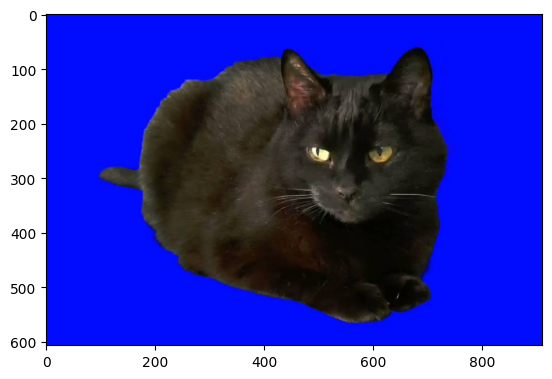

In [76]:
# Make a copy of the image
image_copy = np.copy(image)
image_copy = image_copy[50:657,200:1110]
print(image_copy.shape)
# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

### Define the color threshold

In [77]:
# Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,0,100]) 
upper_blue = np.array([250,250,255])

### Create a mask

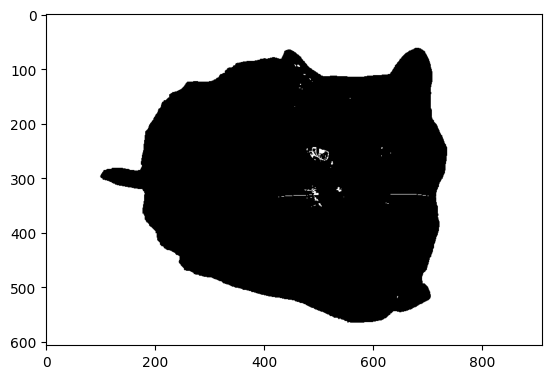

In [78]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

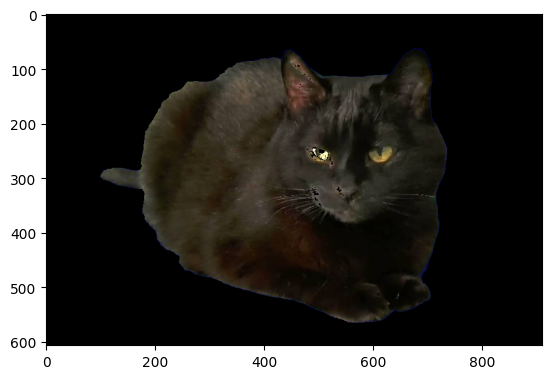

In [79]:
# Mask the image to let the cat show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### Mask and add a background image

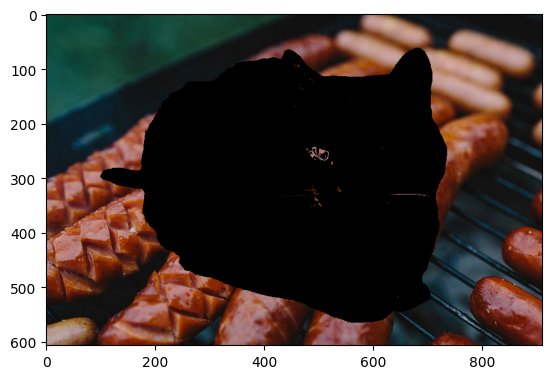

In [80]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('/Users/taniagretton/miniconda3/CHALLENGES/sausage-food-kielbasa-sausages.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Mask the cropped background so that the cat area is blocked
background_image[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(background_image)

### Create a complete image

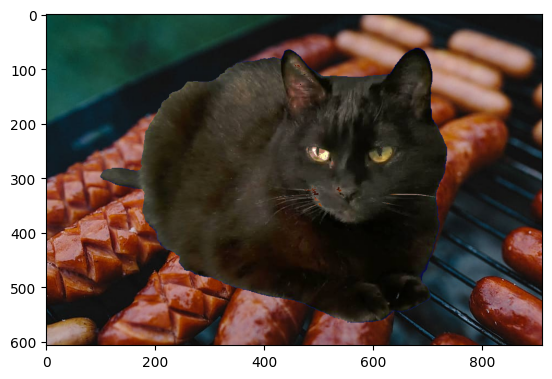

In [81]:
# Add the two images together to create a complete image!
complete_image = masked_image + background_image

# Display the result
plt.imshow(complete_image)